# Machine Learning - FYP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from google.colab import drive, files
import xlrd

### 1) Simple Neural Networks to predict next timestep

#### b) Architecture 2  Next timestep prediction for 6 parameters using 6 inputs


Reading the file and extracting the data

In [2]:
# Reading file

drive.mount('/content/gdrive')
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/dataset.xlsx')

# Reading dataset and separating input features (X) and target labels (y)
X = data.iloc[:, 1:7]  # Input features
y = data.iloc[:, 8:14]   # Target labels (1 for hitting, 0 for missing)

Mounted at /content/gdrive


Scaling and training dataset

In [3]:
X_numpy = X.values
y_numpy = y.values


# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform your input features
X_scaled = scaler.fit_transform(X_numpy)
y_scaled = scaler.fit_transform(y_numpy)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

Defining the model

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = 6))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
93/93 [==============================] - 2s 2ms/step - loss: 0.3444
Epoch 2/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 3/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 4/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/15
93/93 [==============================] - 0s 2ms/step - loss: 7.2652e-04
Epoch 6/15
93/93 [==============================] - 0s 2ms/step - loss: 4.6492e-04
Epoch 7/15
93/93 [==============================] - 0s 3ms/step - loss: 3.2268e-04
Epoch 8/15
93/93 [==============================] - 0s 2ms/step - loss: 2.8471e-04
Epoch 9/15
93/93 [==============================] - 0s 2ms/step - loss: 2.5756e-04
Epoch 10/15
93/93 [==============================] - 0s 2ms/step - loss: 2.2732e-04
Epoch 11/15
93/93 [==============================] - 0s 2ms/step - loss: 2.1024e-04
Epoch 12/15
93/93 [==============================] - 0s 2ms/step - loss: 2.1980e-04
Epoch 13/15
93/93

Evaluating model

In [7]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# Make predictions on the test set
predictions = model.predict(X_test)


#Display input values, original output values, and predicted output values
for i in range(len(X_test)):
    print(f"Input: {X_test[i]}, Original Output: {y_test[i]}, Predicted Output: {predictions[i]}, Error: {(y_test[i] - predictions[i])/y_test[i] }")

24/24 [==============================] - 0s 2ms/step - loss: 8.6976e-05
Mean Squared Error on Test Set: 8.697577868588269e-05
24/24 [==============================] - 0s 2ms/step
Input: [-0.55088778  0.91671032 -0.70747494 -0.17179335  0.13556223 -0.70244381], Original Output: [-0.55168797  0.91826525 -0.70779316 -0.17155851  0.13573635 -0.70276873], Predicted Output: [-0.5558629   0.9106584  -0.7108105  -0.17712265  0.13654445 -0.7052631 ], Error: [-0.00756756  0.00828391 -0.00426299 -0.03243294 -0.00595347 -0.00354931]
Input: [-0.82075069  1.09047524 -0.33421289  0.163088   -1.04854068 -0.33711729], Original Output: [-0.82038928  1.0898794  -0.3328902   0.16085234 -1.04772268 -0.33574578], Predicted Output: [-0.8321984   1.0869248  -0.33662683  0.16910037 -1.051397   -0.34441134], Error: [-0.01439451  0.00271095 -0.0112248  -0.05127707 -0.00350693 -0.02580989]
Input: [-0.82037256  0.76624702  0.5123835  -0.11153386 -0.88845513  0.51384161], Original Output: [-0.82001277  0.76542664  

Assessing model features

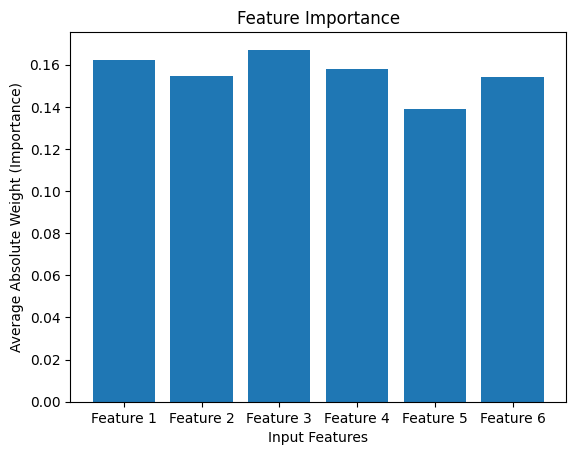

In [8]:
# Get the learned weights of the first dense layer
weights = model.layers[0].get_weights()[0]

# Compute the feature importance as the average absolute weight for each feature
feature_importance = np.mean(np.abs(weights), axis=1)

# Plot the importance of each input feature
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Input Features')
plt.ylabel('Average Absolute Weight (Importance)')
plt.xticks(range(len(feature_importance)), ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'])
plt.title('Feature Importance')
plt.show()